## Linear Regression

In [5]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('train.csv')
print(df_train.shape)
print(df_train.head())
print(df_train[df_train.isna().any(axis=1)])
df_train = df_train.dropna() # Removing NaN values from train set
print(df_train.shape)

df_test = pd.read_csv('test.csv')
print(df_test.head())

x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

(700, 2)
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
               x   y
213  3530.157369 NaN
(699, 2)
    x          y
0  77  79.775152
1  21  23.177279
2  22  25.609262
3  20  17.857388
4  36  41.849864


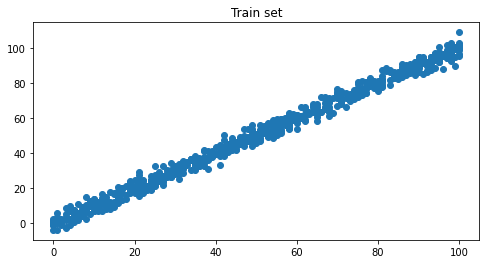

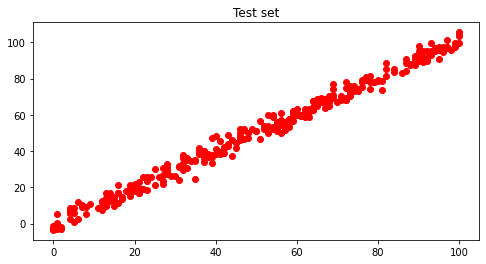

In [6]:
import matplotlib.pyplot as plt
#Plotting Train and Test sets
plt.figure(figsize=(8,4))
plt.title("Train set")
plt.scatter(x_train, y_train)

plt.figure(figsize=(8,4))
plt.title("Test set")
plt.scatter(x_test, y_test, c="red")

In [7]:
#Standardize our values
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(x_train)
X_test = sc_X.transform(x_test)

#Train our model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.9888014444327563


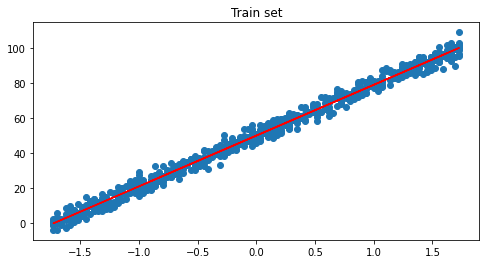

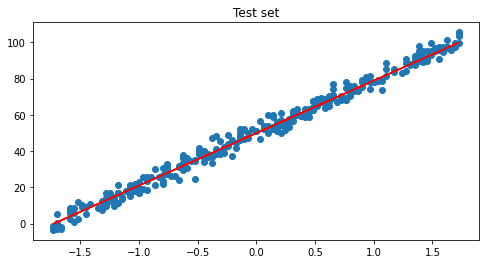

In [8]:
plt.figure(figsize=(8,4))
plt.title("Train set")
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color='red')

plt.figure(figsize=(8,4))
plt.title("Test set")
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')

### Naive Bayes

In [13]:
# load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
 
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target
 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
 
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
 
# making predictions on the testing set
y_pred = gnb.predict(X_test)
 
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 95.0


## Decision Tree

In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
  
# Function importing Dataset
def importdata():
    balance_data = pd.read_csv('balance-scale.data',sep= ',', header = None)
      
    # Printing the dataswet shape
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    # Printing the dataset obseravtions
    print ("Dataset: ",balance_data.head())
    return balance_data
  
# Function to split the dataset
def splitdataset(balance_data):
  
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    print(X[0])
    Y = balance_data.values[:, 0]
    print(Y[0])
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.3, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test
      
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
  
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
  
  
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      
      
# Calling main function
if __name__=="__main__":
    main()

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
[1 1 1 1]
B
Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 

/home/souro/AI-ML-Training_Mindmajix/venv_aimltrn/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/souro/AI-ML-Training_Mindmajix/venv_aimltrn/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/souro/AI-ML-Training_Mindmajix/venv_aimltrn/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

## Random Forest Explanation

Game 1 Mean:  20.05
Game 1 Prob Positive:  0.97


Game 2 Mean:  19.9
Game 2 Prob Positive:  0.64


Game 3 Mean:  19.82
Game 3 Prob Positive:  0.6


/home/souro/AI-ML-Training_Mindmajix/venv_aimltrn/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


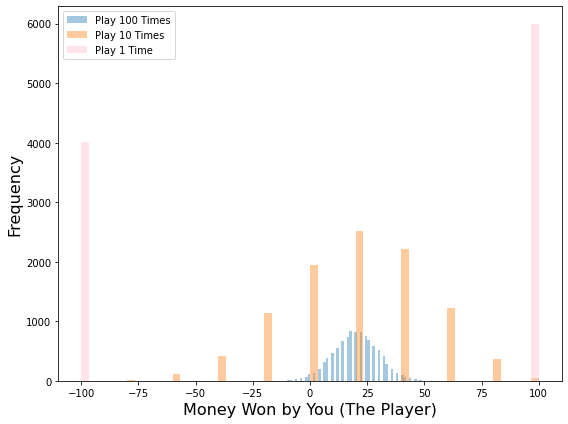

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Game 1
simulations = 10000  # number of Monte Carlo Simulations
games = 100          # number of times the game is played
threshold = 40       # threshold where if greater than or equal to you win
bet = 1              # dollar bet for the game

# outer loop is Monte Carlo sims and inner loop is games played
sim_results_1 = []
for sim in range(simulations):
    result = []
    for g in range(games):
        number = int(np.random.uniform()*100)  # get a random number to see who wins
        if number >= threshold:
            result.append(bet)
        else:
            result.append(-bet)
    sim_results_1.append(sum(result))          # sim_results_1 stores results for Game 1
print('Game 1 Mean: ', round(np.mean(sim_results_1), 2))
print('Game 1 Prob Positive: ', round(sum([1 for i in sim_results_1 if i>0])/simulations, 2))
print('\n')
    

# Game 2 (structure of code is same as above)
simulations = 10000
games = 10
threshold = 40
bet = 10

sim_results_2 = []
for sim in range(simulations):
    result = []
    for g in range(games):
        number = int(np.random.uniform()*100)
        if number >= threshold:
            result.append(bet)
        else:
            result.append(-bet)
    sim_results_2.append(sum(result))
print('Game 2 Mean: ', round(np.mean(sim_results_2), 2))
print('Game 2 Prob Positive: ', round(sum([1 for i in sim_results_2 if i>0])/simulations, 2))
print('\n')
    
    
# Game 3 (structure of code is same as above)
simulations = 10000
games = 1
threshold = 40
bet = 100

sim_results_3 = []
for sim in range(simulations):
    result = []
    for g in range(games):
        number = int(np.random.uniform()*100)
        if number >= threshold:
            result.append(bet)
        else:
            result.append(-bet)
    sim_results_3.append(sum(result))
print('Game 3 Mean: ', round(np.mean(sim_results_3), 2))
print('Game 3 Prob Positive: ', round(sum([1 for i in sim_results_3 if i>0])/simulations, 2))


# Histogram that shows the distribution of the Monte Carlo Results for 2 spending levels
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(sim_results_1, kde=False, bins=60, label='Play 100 Times')
sns.distplot(sim_results_2, kde=False, bins=60, label='Play 10 Times')
sns.distplot(sim_results_3, kde=False, bins=60, label='Play 1 Time', color='pink')

ax.set_xlabel('Money Won by You (The Player)', fontsize=16)
ax.set_ylabel('Frequency',fontsize=16)
plt.legend()
plt.tight_layout()

plt.savefig(fname='game_hist', dpi=150)
plt.show()

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
print(X[0])
print(y[0])
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)
print(regr.predict([[0, 0, 0, 0]]))

[1.76405235 0.40015721 0.97873798 2.2408932 ]
49.822907447421905
[-8.32987858]


## Logistic Regression

In [22]:
import pandas as pd

df = pd.read_csv('Iris.csv') ## Load data
df = df.drop(['Id'],axis=1)
rows = list(range(100,150))
df = df.drop(df.index[rows])  ## Drop the rows with target values Iris-virginica
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(0)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()

In [23]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np

X, Y = shuffle(X,Y)

x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_1 = x_train[:,0]
x_2 = x_train[:,1]
x_3 = x_train[:,2]
x_4 = x_train[:,3]

x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
x_4 = np.array(x_4)

x_1 = x_1.reshape(90,1)
x_2 = x_2.reshape(90,1)
x_3 = x_3.reshape(90,1)
x_4 = x_4.reshape(90,1)

y_train = y_train.reshape(90,1)

In [25]:
## Logistic Regression 
import numpy as np

def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

m = 90
alpha = 0.0001

theta_0 = np.zeros((m,1))
theta_1 = np.zeros((m,1))
theta_2 = np.zeros((m,1))
theta_3 = np.zeros((m,1))
theta_4 = np.zeros((m,1))


epochs = 0
cost_func = []
while(epochs < 10000):
    y = theta_0 + theta_1 * x_1 + theta_2 * x_2 + theta_3 * x_3 + theta_4 * x_4
    y = sigmoid(y)
    
    cost = (- np.dot(np.transpose(y_train),np.log(y)) - np.dot(np.transpose(1-y_train),np.log(1-y)))/m
    
    theta_0_grad = np.dot(np.ones((1,m)),y-y_train)/m
    theta_1_grad = np.dot(np.transpose(x_1),y-y_train)/m
    theta_2_grad = np.dot(np.transpose(x_2),y-y_train)/m
    theta_3_grad = np.dot(np.transpose(x_3),y-y_train)/m
    theta_4_grad = np.dot(np.transpose(x_4),y-y_train)/m
    
    theta_0 = theta_0 - alpha * theta_0_grad
    theta_1 = theta_1 - alpha * theta_1_grad
    theta_2 = theta_2 - alpha * theta_2_grad
    theta_3 = theta_3 - alpha * theta_3_grad
    theta_4 = theta_4 - alpha * theta_4_grad
    
    cost_func.append(cost)
    epochs += 1

In [26]:
from sklearn.metrics import accuracy_score

test_x_1 = x_test[:,0]
test_x_2 = x_test[:,1]
test_x_3 = x_test[:,2]
test_x_4 = x_test[:,3]

test_x_1 = np.array(test_x_1)
test_x_2 = np.array(test_x_2)
test_x_3 = np.array(test_x_3)
test_x_4 = np.array(test_x_4)

test_x_1 = test_x_1.reshape(10,1)
test_x_2 = test_x_2.reshape(10,1)
test_x_3 = test_x_3.reshape(10,1)
test_x_4 = test_x_4.reshape(10,1)

index = list(range(10,90))

theta_0 = np.delete(theta_0, index)
theta_1 = np.delete(theta_1, index)
theta_2 = np.delete(theta_2, index)
theta_3 = np.delete(theta_3, index)
theta_4 = np.delete(theta_4, index)

theta_0 = theta_0.reshape(10,1)
theta_1 = theta_1.reshape(10,1)
theta_2 = theta_2.reshape(10,1)
theta_3 = theta_3.reshape(10,1)
theta_4 = theta_4.reshape(10,1)

y_pred = theta_0 + theta_1 * test_x_1 + theta_2 * test_x_2 + theta_3 * test_x_3 + theta_4 * test_x_4
y_pred = sigmoid(y_pred)

new_y_pred =[]
for val in y_pred:
    if(val >= 0.5):
        new_y_pred.append(1)
    else:
        new_y_pred.append(0)

print(accuracy_score(y_test,new_y_pred))

1.0


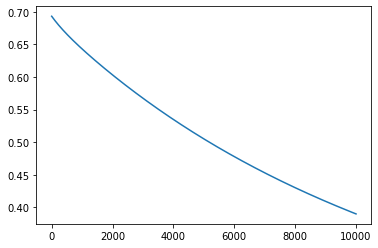

In [27]:
import matplotlib.pyplot as plt 

cost_func = np.array(cost_func)
cost_func = cost_func.reshape(10000,1)
plt.plot(range(len(cost_func)),cost_func)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


/home/souro/AI-ML-Training_Mindmajix/venv_aimltrn/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## KNN

In [29]:
from collections import Counter
import math

def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    
    # 3. For each example in the data
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Get the labels of the selected K entries
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

def main():
    '''
    # Regression Data
    # 
    # Column 0: height (inches)
    # Column 1: weight (pounds)
    '''
    reg_data = [
       [65.75, 112.99],
       [71.52, 136.49],
       [69.40, 153.03],
       [68.22, 142.34],
       [67.79, 144.30],
       [68.70, 123.30],
       [69.80, 141.49],
       [70.01, 136.46],
       [67.90, 112.37],
       [66.49, 127.45],
    ]
    
    # Question:
    # Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
    reg_query = [60]
    reg_k_nearest_neighbors, reg_prediction = knn(
        reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean
    )
    print(reg_k_nearest_neighbors)
    print(reg_prediction)
    
    '''
    # Classification Data
    # 
    # Column 0: age
    # Column 1: likes pineapple
    '''
    clf_data = [
       [22, 1],
       [23, 1],
       [21, 1],
       [18, 1],
       [19, 1],
       [25, 0],
       [27, 0],
       [29, 0],
       [31, 0],
       [45, 0],
    ]
    # Question:
    # Given the data we have, does a 33 year old like pineapples on their pizza?
    clf_query = [33]
    clf_k_nearest_neighbors, clf_prediction = knn(
        clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode
    )
    print(clf_k_nearest_neighbors)
    print(clf_prediction)

if __name__ == '__main__':
    main()

[(5.75, 0), (6.489999999999995, 9), (7.790000000000006, 4)]
128.24666666666667
[(2.0, 8), (4.0, 7), (6.0, 6)]
0


In [13]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


## SVM

In [30]:
import pandas as pd

df = pd.read_csv('Iris.csv')
print(df.head())
df = df.drop(['Id'],axis=1)
target = df['Species']
s = set()
for val in target:
    s.add(val)
s = list(s)
rows = list(range(100,150))
df = df.drop(df.index[rows])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


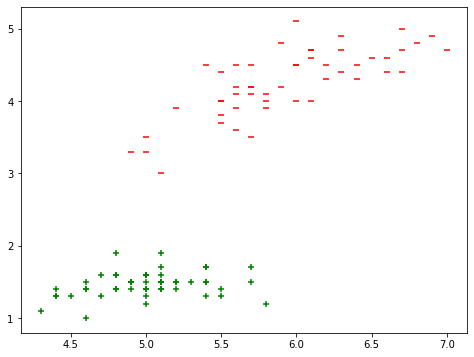

In [31]:
import matplotlib.pyplot as plt

x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.show()

In [32]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
## Drop rest of the features and extract the target values
df = df.drop(['SepalWidthCm','PetalWidthCm'],axis=1)
Y = []
target = df['Species']
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['Species'],axis=1)
X = df.values.tolist()
## Shuffle and split the data into training and test set
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

In [33]:
## Support Vector Machine 
import numpy as np

train_f1 = x_train[:,0]
train_f2 = x_train[:,1]

train_f1 = train_f1.reshape(90,1)
train_f2 = train_f2.reshape(90,1)

w1 = np.zeros((90,1))
w2 = np.zeros((90,1))

epochs = 1
alpha = 0.0001

while(epochs < 10000):
    y = w1 * train_f1 + w2 * train_f2
    prod = y * y_train
    print(epochs)
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            w1 = w1 - alpha * (2 * 1/epochs * w1)
            w2 = w2 - alpha * (2 * 1/epochs * w2)
            
        else:
            cost = 1 - val 
            w1 = w1 + alpha * (train_f1[count] * y_train[count] - 2 * 1/epochs * w1)
            w2 = w2 + alpha * (train_f2[count] * y_train[count] - 2 * 1/epochs * w2)
        count += 1
    epochs += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111


3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975


5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920


7669
7670
7671
7672
7673
7674
7675
7676
7677
7678
7679
7680
7681
7682
7683
7684
7685
7686
7687
7688
7689
7690
7691
7692
7693
7694
7695
7696
7697
7698
7699
7700
7701
7702
7703
7704
7705
7706
7707
7708
7709
7710
7711
7712
7713
7714
7715
7716
7717
7718
7719
7720
7721
7722
7723
7724
7725
7726
7727
7728
7729
7730
7731
7732
7733
7734
7735
7736
7737
7738
7739
7740
7741
7742
7743
7744
7745
7746
7747
7748
7749
7750
7751
7752
7753
7754
7755
7756
7757
7758
7759
7760
7761
7762
7763
7764
7765
7766
7767
7768
7769
7770
7771
7772
7773
7774
7775
7776
7777
7778
7779
7780
7781
7782
7783
7784
7785
7786
7787
7788
7789
7790
7791
7792
7793
7794
7795
7796
7797
7798
7799
7800
7801
7802
7803
7804
7805
7806
7807
7808
7809
7810
7811
7812
7813
7814
7815
7816
7817
7818
7819
7820
7821
7822
7823
7824
7825
7826
7827
7828
7829
7830
7831
7832
7833
7834
7835
7836
7837
7838
7839
7840
7841
7842
7843
7844
7845
7846
7847
7848
7849
7850
7851
7852
7853
7854
7855
7856
7857
7858
7859
7860
7861
7862
7863
7864
7865
7866
7867
7868


9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514
9515
9516
9517


In [34]:
from sklearn.metrics import accuracy_score

## Clip the weights 
index = list(range(10,90))
w1 = np.delete(w1,index)
w2 = np.delete(w2,index)

w1 = w1.reshape(10,1)
w2 = w2.reshape(10,1)
## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)
## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

print(accuracy_score(y_test,predictions))

1.0


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))

[ 1  1  1 -1 -1  1 -1  1  1 -1]
1.0


/home/souro/AI-ML-Training_Mindmajix/venv_aimltrn/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## ANN

In [37]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

dataset = pd.read_csv('pima-indians-diabetes.csv')
print(dataset.head())
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=10)
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]
print(rounded)

   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0
Epoch 1/150
77/77 [==============================] - 0s 935us/step - loss: 4.5082 - accuracy: 0.5932
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 1.1098 - accuracy: 0.5554
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8097 - accuracy: 0.6258
Epoch 4/150
77/77 [==============================] - 0s 974us/step - loss: 0.7680 - accuracy: 0.6402
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7061 - accuracy: 0.6584
Epoch 6/150
77/77 [==============================] - 0s 914us/step - loss: 0.6763 - accuracy: 0.6675
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6627 - accuracy: 0.6571
Epoch 8/150
77/77 [========================

## K-means

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

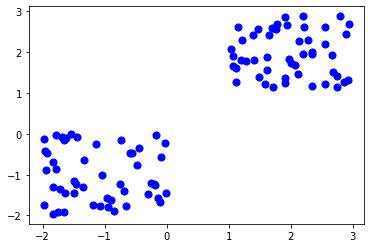

In [63]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [64]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

In [65]:
Kmean.cluster_centers_

array([[-1.10370103, -1.00427831],
       [ 1.95756569,  1.97183354]])

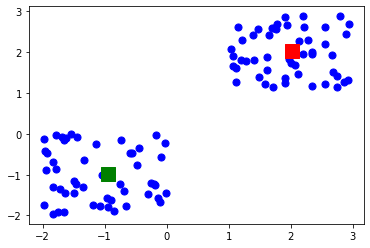

In [66]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

In [67]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [68]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([0], dtype=int32)

## Hierarchical Clustering

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

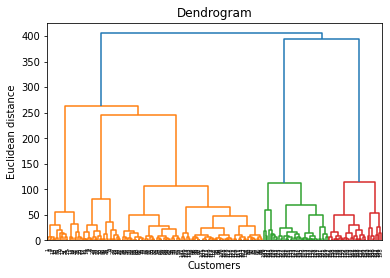

In [71]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [72]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

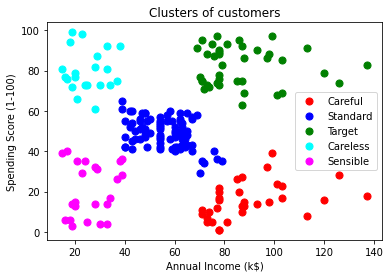

In [73]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## GaussianMixture Model

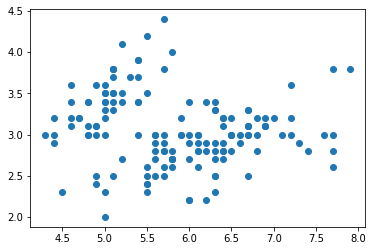

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
 
# load the iris dataset
iris = datasets.load_iris()
 
# select first two columns
X = iris.data[:, :2]
 
# turn it into a dataframe
d = pd.DataFrame(X)
 
# plot the data
plt.scatter(d[0], d[1])

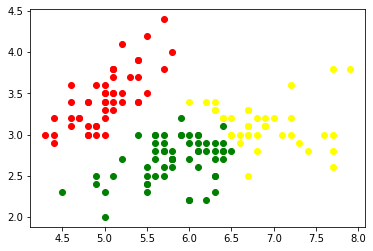

In [75]:
gmm = GaussianMixture(n_components = 3)
 
# Fit the GMM model for the dataset
# which expresses the dataset as a
# mixture of 3 Gaussian Distribution
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')

In [76]:
# print the converged log-likelihood value
print(gmm.lower_bound_)
 
# print the number of iterations needed
# for the log-likelihood value to converge
print(gmm.n_iter_)

-1.4985672470486964
8


## PCA

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# Here we are using inbuilt dataset of scikit learn
from sklearn.datasets import load_breast_cancer
  
# instantiating
cancer = load_breast_cancer()
  
# creating dataframe
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
  
# checking head of dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [79]:
# Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(df)
scaled_data = scalar.transform(df)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(569, 2)

Text(0, 0.5, 'Second Principal Component')

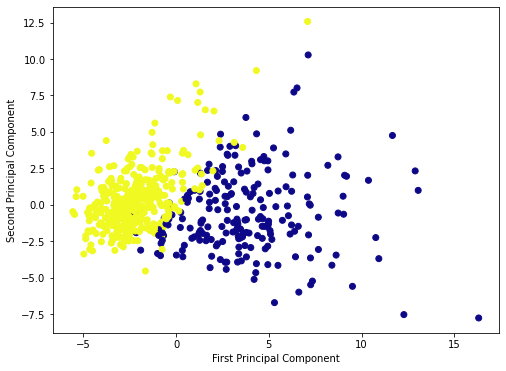

In [80]:
# giving a larger plot
plt.figure(figsize =(8, 6))
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma')
  
# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [81]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

<AxesSubplot:>

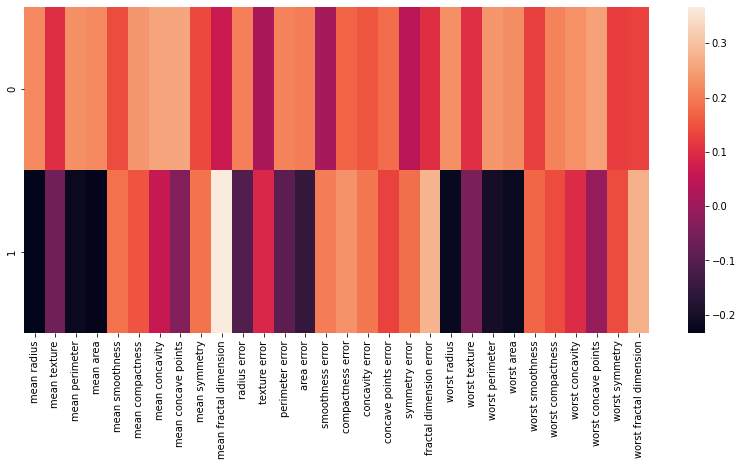

In [82]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

## Keras

In [42]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load the dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
77/77 [==============================] - 0s 1ms/step - loss: 19.8708 - accuracy: 0.3789
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 3.1504 - accuracy: 0.5247
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.6526 - accuracy: 0.6198
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 1.2837 - accuracy: 0.6224
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 1.0644 - accuracy: 0.6549
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9393 - accuracy: 0.6432
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8531 - accuracy: 0.6445
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8307 - accuracy: 0.6406
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7615 - accuracy: 0.6562
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7636 - accuracy: 0.6641
Epoch 11

77/77 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7552
Epoch 84/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7487
Epoch 85/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7435
Epoch 86/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7474
Epoch 87/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7461
Epoch 88/150
77/77 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7474
Epoch 89/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5039 - accuracy: 0.7500
Epoch 90/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.7474
Epoch 91/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5222 - accuracy: 0.7266
Epoch 92/150
77/77 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.7500
Epoch 93/150


## Tensorflow

In [45]:
# mlp for binary classification
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
df = read_csv(path, header=None)
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]
# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
y = LabelEncoder().fit_transform(y)
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=1)
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
# make a prediction
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

(235, 34) (116, 34) (235,) (116,)
Epoch 1/150
8/8 [==============================] - 0s 2ms/step - loss: 0.7346 - accuracy: 0.5191
Epoch 2/150
8/8 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.6213
Epoch 3/150
8/8 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6638
Epoch 4/150
8/8 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6681
Epoch 5/150
8/8 [==============================] - 0s 3ms/step - loss: 0.6204 - accuracy: 0.6723
Epoch 6/150
8/8 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.6809
Epoch 7/150
8/8 [==============================] - 0s 3ms/step - loss: 0.5884 - accuracy: 0.6809
Epoch 8/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7106
Epoch 9/150
8/8 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7660
Epoch 10/150
8/8 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.

8/8 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9660
Epoch 85/150
8/8 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9660
Epoch 86/150
8/8 [==============================] - 0s 3ms/step - loss: 0.1097 - accuracy: 0.9702
Epoch 87/150
8/8 [==============================] - 0s 2ms/step - loss: 0.1081 - accuracy: 0.9702
Epoch 88/150
8/8 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9702
Epoch 89/150
8/8 [==============================] - 0s 3ms/step - loss: 0.1053 - accuracy: 0.9702
Epoch 90/150
8/8 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.9702
Epoch 91/150
8/8 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9702
Epoch 92/150
8/8 [==============================] - 0s 3ms/step - loss: 0.1008 - accuracy: 0.9702
Epoch 93/150
8/8 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9702
Epoch 94/150
8/8 [===============

# RNN

In [46]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

Epoch 1/20
187/187 - 1s - loss: 0.1337
Epoch 2/20
187/187 - 0s - loss: 0.0731
Epoch 3/20
187/187 - 0s - loss: 0.0596
Epoch 4/20
187/187 - 0s - loss: 0.0492
Epoch 5/20
187/187 - 0s - loss: 0.0419
Epoch 6/20
187/187 - 0s - loss: 0.0359
Epoch 7/20
187/187 - 0s - loss: 0.0314
Epoch 8/20
187/187 - 0s - loss: 0.0275
Epoch 9/20
187/187 - 0s - loss: 0.0246
Epoch 10/20
187/187 - 0s - loss: 0.0219
Epoch 11/20
187/187 - 0s - loss: 0.0199
Epoch 12/20
187/187 - 0s - loss: 0.0179
Epoch 13/20
187/187 - 0s - loss: 0.0163
Epoch 14/20
187/187 - 0s - loss: 0.0147
Epoch 15/20
187/187 - 0s - loss: 0.0134
Epoch 16/20
187/187 - 0s - loss: 0.0121
Epoch 17/20
187/187 - 0s - loss: 0.0109
Epoch 18/20
187/187 - 0s - loss: 0.0097
Epoch 19/20
187/187 - 1s - loss: 0.0088
Epoch 20/20
187/187 - 0s - loss: 0.0082
Train RMSE: 0.086 RMSE
Test RMSE: 0.117 RMSE


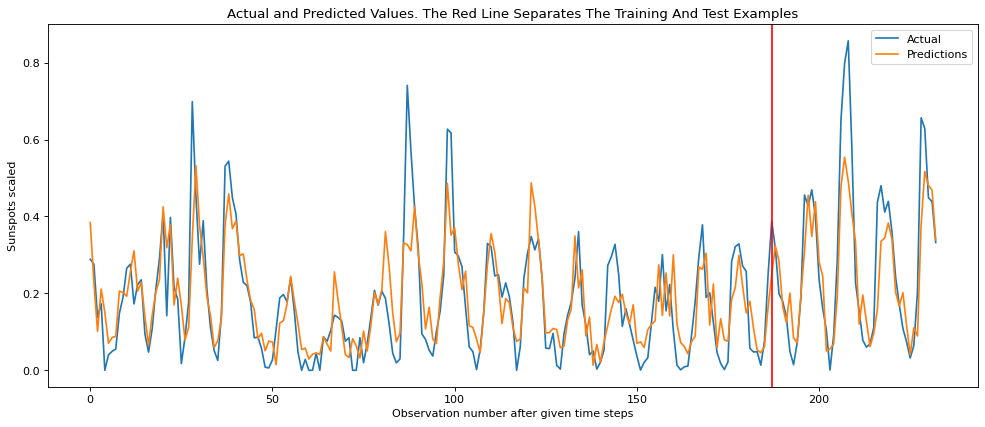

In [47]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data
 
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y
 
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
 
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
 
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)
 
# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
 
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
 
# Print error
print_error(trainY, testY, train_predict, test_predict)
 
#Plot result
plot_result(trainY, testY, train_predict, test_predict)

## CNN

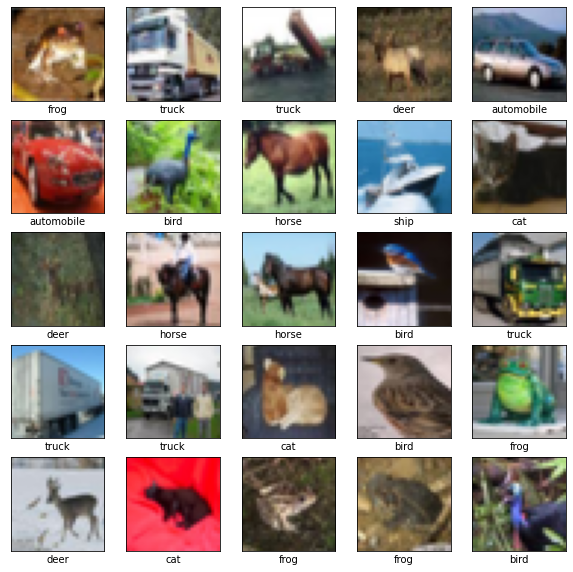

In [48]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 64)              

In [51]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels))

Epoch 1/3
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5313 - accuracy: 0.4407 - val_loss: 1.2550 - val_accuracy: 0.5442
Epoch 2/3
1563/1563 [==============================] - 51s 33ms/step - loss: 1.1534 - accuracy: 0.5904 - val_loss: 1.0962 - val_accuracy: 0.6132
Epoch 3/3
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0140 - accuracy: 0.6432 - val_loss: 1.0132 - val_accuracy: 0.6480


313/313 - 1s - loss: 1.0132 - accuracy: 0.6480


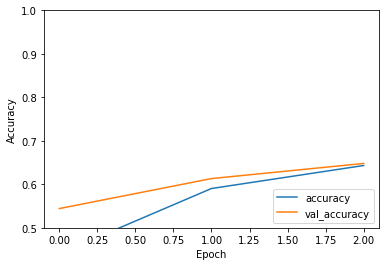

In [52]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [53]:
print(test_acc)

0.6480000019073486
